In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import numpy as np
from sklearn.decomposition import PCA

Autoencoders

In [2]:
# Define the FF class
class FF(nn.Module):
    def __init__(self, dim1, dim2, dim3):
        super().__init__()
        self.main = nn.Sequential(
            nn.Linear(in_features=dim1, out_features=dim2),
            nn.ReLU(),
            nn.Linear(in_features=dim2, out_features=dim3)
        )

    def forward(self, input):
        return self.main(input)

# Define the Autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, dim1, dim2, dim3):
        super().__init__()
        self.encoder = FF(dim1, dim2, dim3)
        self.decoder = nn.Sequential(
            FF(dim3, dim2, dim1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Training function
def train(data_loader, model, optimizer, loss_function, epochs=20):
    model.to(device)
    losses = []
    for epoch in range(epochs):
        for i, (x, y) in enumerate(data_loader):
            x = x.to(device)
            optimizer.zero_grad()
            x_hat = model(x)
            loss = loss_function(x, x_hat)
            losses.append(loss.clone().detach().cpu().numpy())
            loss.backward()
            optimizer.step()
            if i % 100 == 0:
                print(f"{epoch}/{i}: {loss}")
    return (model, losses)

In [3]:
# Data
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: torch.flatten(x,start_dim=-2))])
data = datasets.MNIST('./data', transform=transform, download=True)
n, w, h = data.data.shape
data_loader = torch.utils.data.DataLoader(data, batch_size=128, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the range for dim3
dim3_range = range(2, 21)

reconstruction_errors = []

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 3.83MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.78MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Train and calculate reconstruction errors
for dim3 in dim3_range:
    model = Autoencoder(w*h, 512, dim3)
    optimizer = optim.Adam(model.parameters())
    loss_function = nn.MSELoss()
l
    autoencoder, losses = train(data_loader, model, optimizer, loss_function, epochs=5)
    reconstruction_errors.append(np.mean(losses))

0/0: 0.23622100055217743
0/100: 0.061401452869176865
0/200: 0.050868790596723557
0/300: 0.052530404180288315
0/400: 0.052626848220825195
1/0: 0.0466855987906456
1/100: 0.050293125212192535
1/200: 0.048185717314481735
1/300: 0.044538505375385284
1/400: 0.04494725912809372
2/0: 0.04783562198281288
2/100: 0.04668007791042328
2/200: 0.049084607511758804
2/300: 0.047222938388586044
2/400: 0.048418331891298294
3/0: 0.04467233270406723
3/100: 0.04180367663502693
3/200: 0.04516012594103813
3/300: 0.04494433477520943
3/400: 0.04508258402347565
4/0: 0.04208310693502426
4/100: 0.04523250833153725
4/200: 0.045587100088596344
4/300: 0.043037064373493195
4/400: 0.044010229408741
0/0: 0.23407329618930817
0/100: 0.057491693645715714
0/200: 0.04915813356637955
0/300: 0.044214002788066864
0/400: 0.04277636855840683
1/0: 0.03958050161600113
1/100: 0.04108944535255432
1/200: 0.039308156818151474
1/300: 0.04073800891637802
1/400: 0.03914283961057663
2/0: 0.0368121936917305
2/100: 0.038530778139829636
2/200

PCA

In [5]:
# data
data_flattened = data.data.numpy().reshape(len(data), -1)
data_normalized = data_flattened / 255.0

# Calculate reconstruction error
reconstruction_errors1 = []
components_range = range(2, 21)

for n_components in dim3_range:
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(data_normalized)  # Project data to lower dimensions
    reconstruction_error = np.mean((data_normalized - pca.inverse_transform(X_reduced)) ** 2)
    reconstruction_errors1.append(reconstruction_error)

Plot

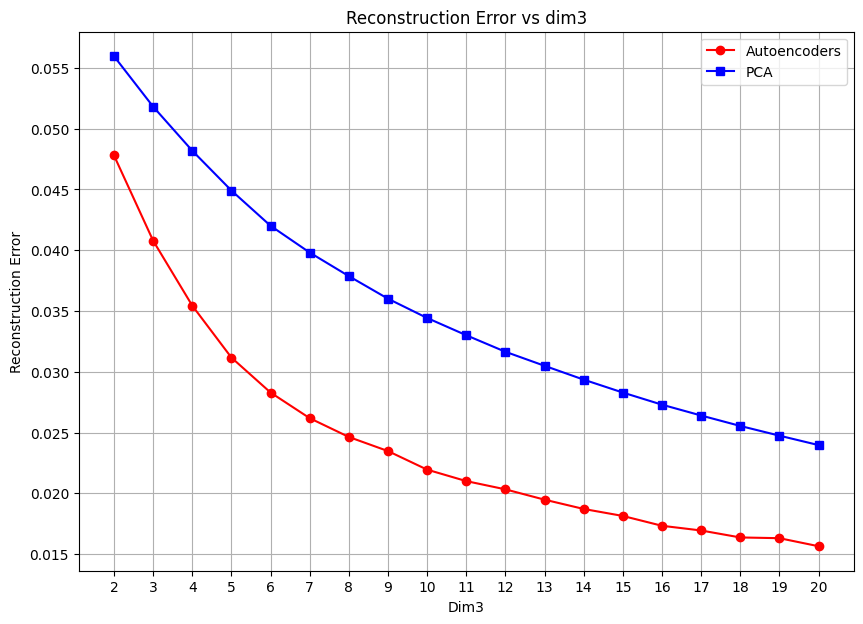

In [9]:
plt.figure(figsize=(10, 7))
plt.plot(dim3_range, reconstruction_errors, marker='o', color='r', label='Autoencoders')
plt.plot(dim3_range, reconstruction_errors1, marker='s', color='b', label='PCA')
plt.xticks(ticks=sorted(dim3_range), labels=[str(x) for x in sorted(dim3_range)])
plt.xlabel('Dim3')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs dim3')
plt.grid(True)
plt.legend()
plt.show()
